In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/data/upgrad/SEM2/LogisticAssignment_LeadScoring/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/data/upgrad/SEM2/LogisticAssignment_LeadScoring


In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_rows = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset

leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# Dropping the following columns because this is the data collected by the sales team after contacting potential leads.

leads = leads.drop(["Tags", "Lead Profile", "Lead Quality","Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score"],axis = 1)

# Setting "Lead Number as the index"

leads = leads.set_index("Lead Number")

In [ ]:
leads.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000


In [ ]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                

In [ ]:
# Checking the percentage of null values
leads.isnull().mean().sort_values(ascending = False)*100

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.000000
A free copy of Mastering The Interview            0.0000

#Investigating categorical variables

In [ ]:
leads.select_dtypes(include = "O").head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,
660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
660728,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
660681,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [ ]:
# Replacing "Select" with NaN
leads = leads.replace("Select",np.NaN)

In [ ]:
leads.select_dtypes(include = "O").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Do Not Email                                   9240 non-null   object
 4   Do Not Call                                    9240 non-null   object
 5   Last Activity                                  9137 non-null   object
 6   Country                                        6779 non-null   object
 7   Specialization                                 5860 non-null   object
 8   How did you hear about X Education             1990 non-null   object
 9   What is your current occupation                6550 non-

In [ ]:
leads.select_dtypes(include = "O").describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,5860,1990,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,5571,9240,9240,9240
unique,9240,5,21,2,2,17,38,18,9,6,3,2,1,2,2,2,2,2,1,1,1,6,1,2,16
top,41be9bb9-d021-4594-a46d-e0b44759bf1a,Landing Page Submission,Google,No,No,Email Opened,India,Finance Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,976,808,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,3222,9240,6352,3407


In [ ]:
# Checking for null percentage
leads.select_dtypes(include = "O").isnull().mean().sort_values(ascending = False)*100

How did you hear about X Education               78.463203
City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Last Activity                                     1.114719
Lead Source                                       0.389610
Last Notable Activity                             0.000000
Search                                            0.000000
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Magazine                                          0.000000
A free copy of Mastering The Interview            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

# Plotting frequency chart for categorical variables

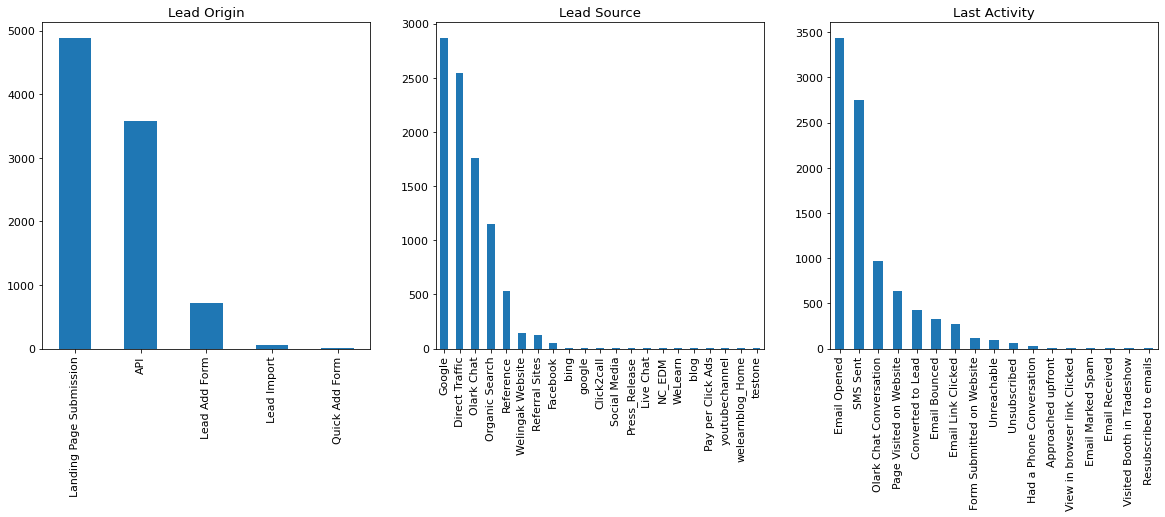

In [ ]:
# Plotting value counts for each categorical variable
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
leads["Lead Origin"	].value_counts().plot(kind = "bar", title = "Lead Origin")
plt.subplot(1,3,2)
leads["Lead Source"].value_counts().plot(kind = "bar", title = "Lead Source")
plt.subplot(1,3,3)
leads["Last Activity"	].value_counts().plot(kind = "bar", title = "Last Activity")

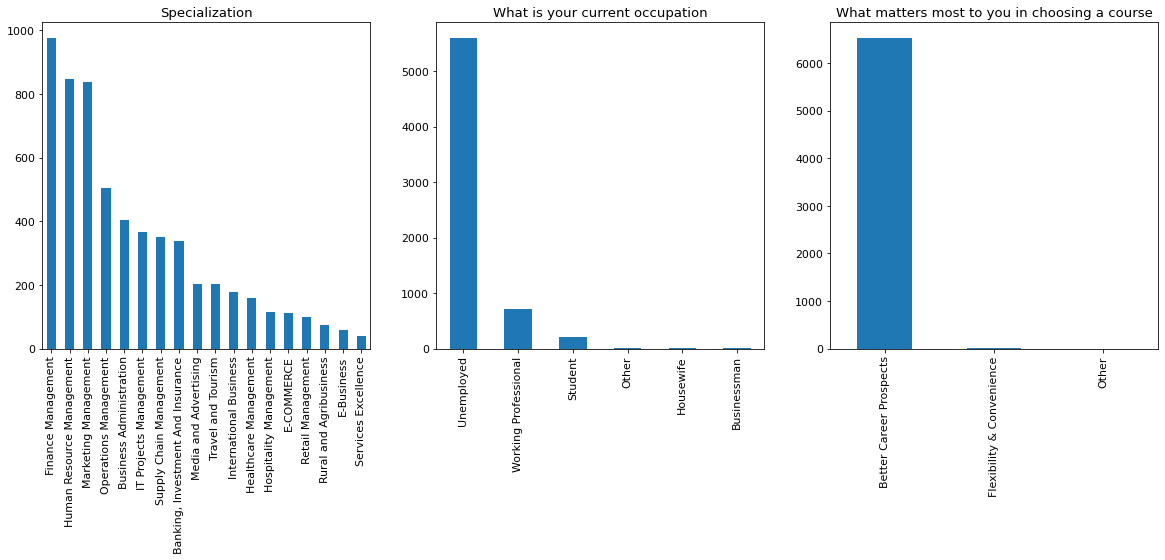

In [ ]:
# Plotting value counts for each categorical variable
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
leads["Specialization"].value_counts().plot(kind = "bar", title = "Specialization")
plt.subplot(1,3,2)
leads["What is your current occupation"].value_counts().plot(kind = "bar", title = "What is your current occupation")
plt.subplot(1,3,3)
leads["What matters most to you in choosing a course"].value_counts().plot(kind = "bar", title = "What matters most to you in choosing a course")

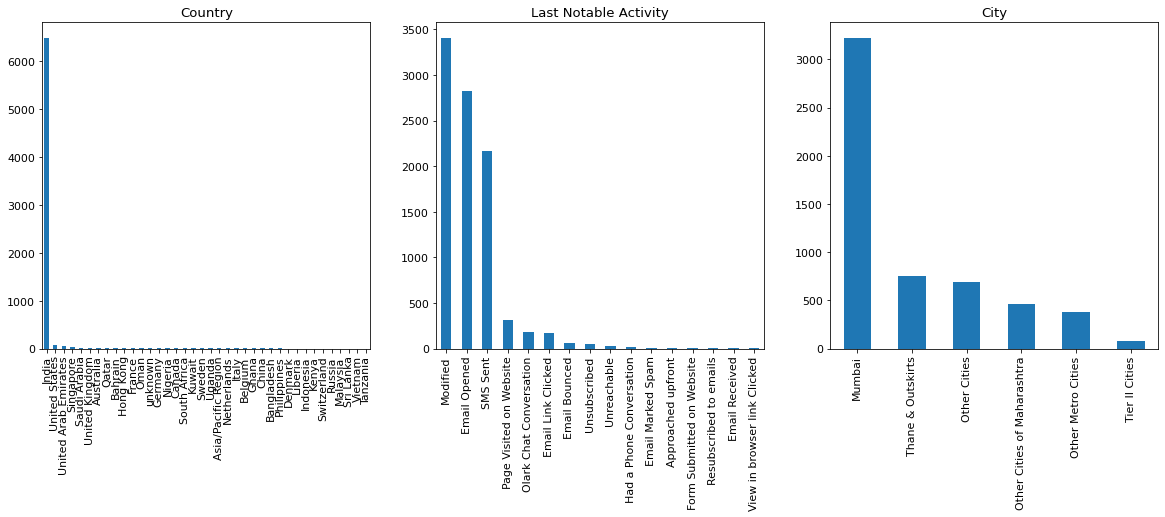

In [ ]:
# Plotting value counts for each categorical variable
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
leads["Country"].value_counts().plot(kind = "bar", title = "Country")
plt.subplot(1,3,2)
leads["Last Notable Activity"].value_counts().plot(kind = "bar", title = "Last Notable Activity")
plt.subplot(1,3,3)
leads["City"].value_counts().plot(kind = "bar", title = "City")

#Bivariate Analysis
###Checking the proportion of the target variable ("Converted") for each categorical variable

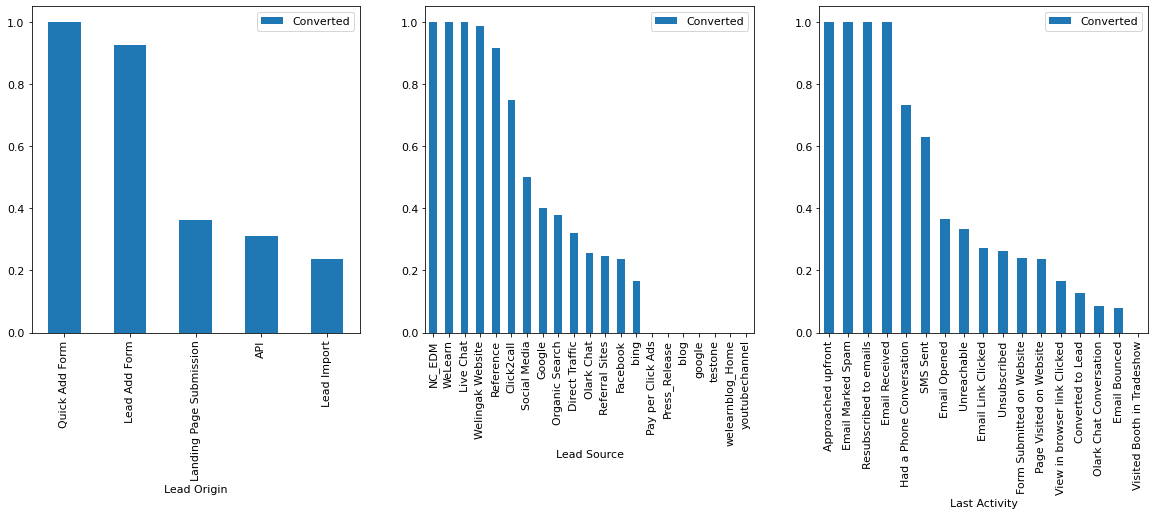

In [ ]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,3,1)
leads.groupby("Lead Origin").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax1)
ax2 = plt.subplot(1,3,2)
leads.groupby("Lead Source").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax2)
ax3 = plt.subplot(1,3,3)
leads.groupby("Last Activity").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax3)

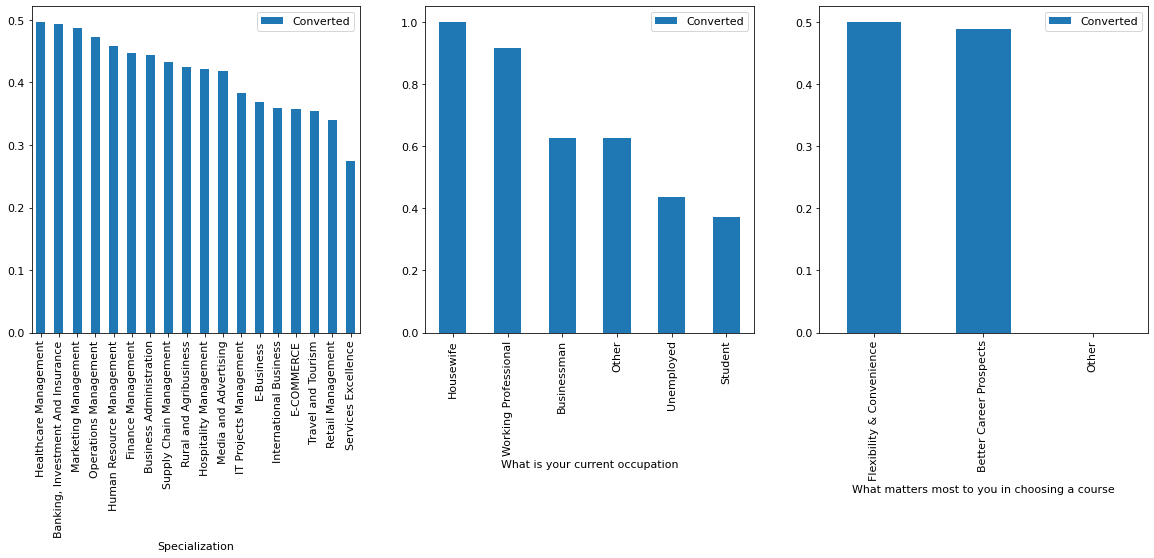

In [ ]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,3,1)
leads.groupby("Specialization").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax1)
ax2 = plt.subplot(1,3,2)
leads.groupby("What is your current occupation").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax2)
ax3 = plt.subplot(1,3,3)
leads.groupby("What matters most to you in choosing a course").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax3)

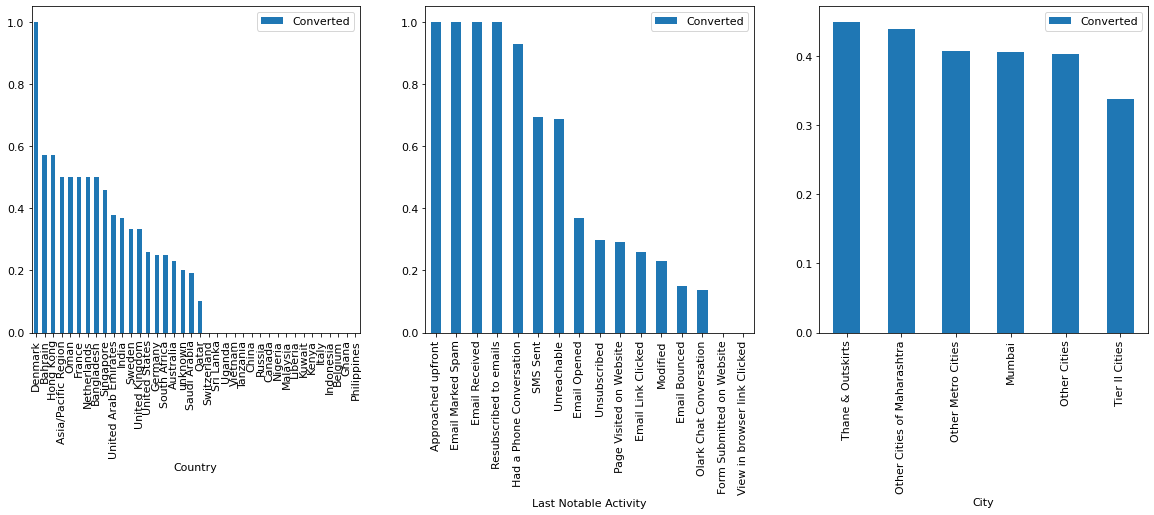

In [ ]:
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,3,1)
leads.groupby("Country").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax1)
ax2 = plt.subplot(1,3,2)
leads.groupby("Last Notable Activity").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax2)
ax3 = plt.subplot(1,3,3)
leads.groupby("City").agg({"Converted": "mean"}).sort_values('Converted', ascending=False).plot(kind = "bar", ax = ax3)

#Investigating numeric variables


In [ ]:
leads.select_dtypes(include = "number").head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,,,,
660737,0,0.0,0,0.0
660728,0,5.0,674,2.5
660727,1,2.0,1532,2.0
660719,0,1.0,305,1.0
660681,1,2.0,1428,1.0


In [ ]:
leads.select_dtypes(include = "number").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Converted                    9240 non-null   int64  
 1   TotalVisits                  9103 non-null   float64
 2   Total Time Spent on Website  9240 non-null   int64  
 3   Page Views Per Visit         9103 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 360.9 KB


In [ ]:
leads.select_dtypes(include = "number").describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [ ]:
# Checking null percentage

leads.select_dtypes(include = "number").isnull().mean().sort_values(ascending = False)*100

Page Views Per Visit           1.482684
TotalVisits                    1.482684
Total Time Spent on Website    0.000000
Converted                      0.000000
dtype: float64

[Text(0, 0.5, ''), Text(0.5, 1.0, 'A free copy of Mastering The Interview')]

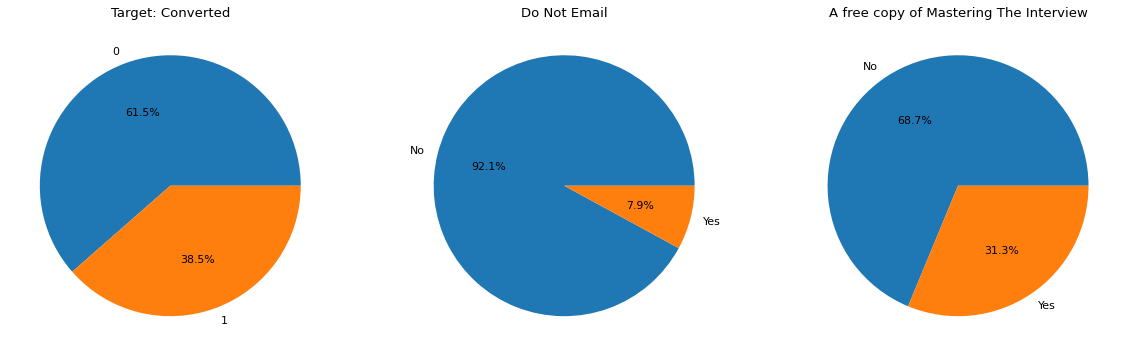

In [ ]:
# Plotting pie chart to show the proportion of binary variables

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.rcParams.update({'font.size': 11})
cx = leads["Converted"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
cx.set(title = "Target: Converted", ylabel = "")
plt.subplot(1,3,2)
ax = leads["Do Not Email"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
ax.set(title = "Do Not Email", ylabel = "")
plt.subplot(1,3,3)
bx = leads["A free copy of Mastering The Interview"].value_counts().plot(kind = "pie", autopct='%1.1f%%')
bx.set(title = "A free copy of Mastering The Interview", ylabel = "")

In [ ]:
leads.select_dtypes(include = "number").describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000


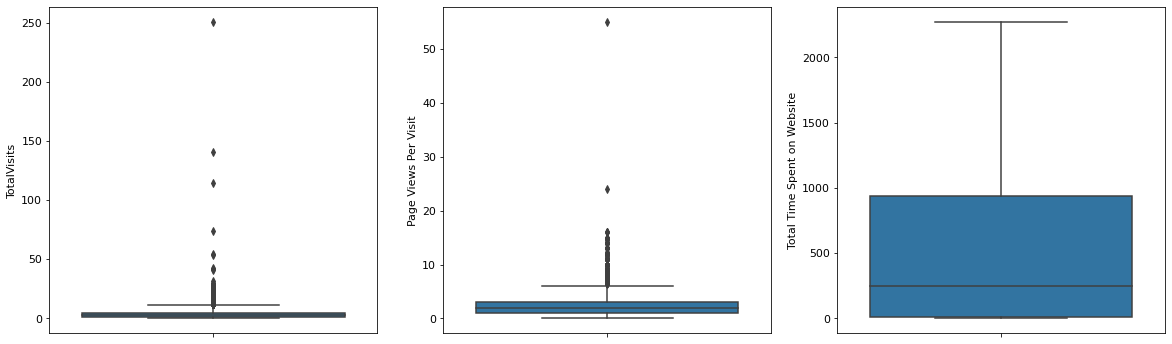

In [ ]:
# Visualising numeric variables and checking for outliers
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot( y = "TotalVisits", data = leads)
plt.subplot(1,3,2)
sns.boxplot( y = "Page Views Per Visit", data = leads)
plt.subplot(1,3,3)
sns.boxplot( y = "Total Time Spent on Website", data = leads)

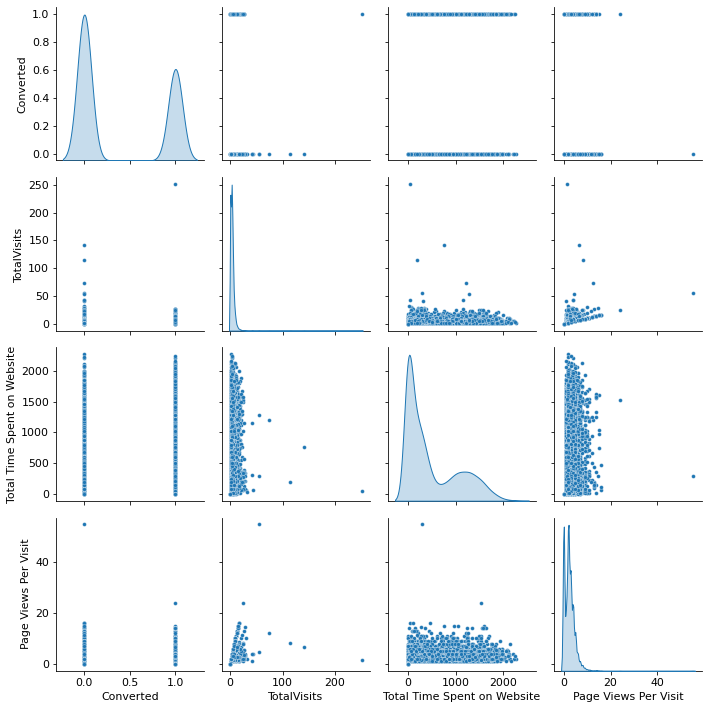

In [ ]:
# Plotting pairplots to check correlations between numeric varibales
sns.pairplot(leads, plot_kws={"s": 15}, diag_kind='kde')

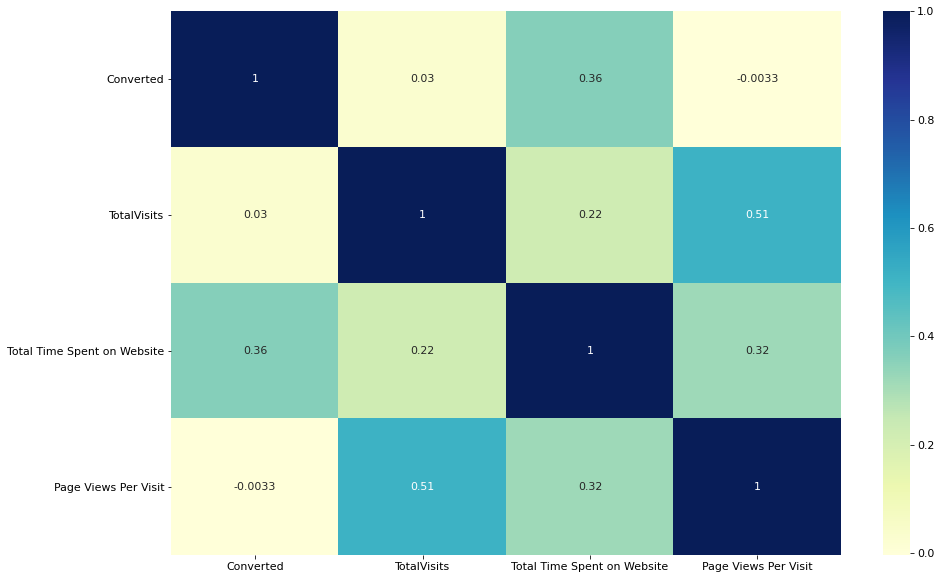

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (15, 10))
sns.heatmap(leads.corr(), annot = True, cmap="YlGnBu")
plt.show()

There are no highly correlated variables in this dataset